In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import math

# 1.I-MR Chart

In [2]:
df=pd.DataFrame({
            'Month':[1,2,3,4,5,6,7,8,9,10,11],
            'Distance':[82,84,75,79,84,81,81,82,80,78,74]
    
             })
df.Distance=df['Distance'].astype(float)
df.Month=df['Month'].astype(int)
df

,Month,Distance
0,1,82.0
1,2,84.0
2,3,75.0
3,4,79.0
4,5,84.0
5,6,81.0
6,7,81.0
7,8,82.0
8,9,80.0
9,10,78.0


In [3]:
df1=df.copy()

In [4]:
def mi_Chart(df,n):
    cum_sum=[]
    i=0
    A2=1.88
    E2= 1.88 * math.sqrt(n)
    distance=df['Distance']
    diff = abs(df['Distance'].diff())
    df['MR'] =diff
    x_bar=df['Distance'].mean()
    df['X_bar']= np.repeat(x_bar,len(df))
    MR_bar=df['MR'].sum()/(len(df)-1)
    UCL = x_bar + E2 * MR_bar
    ucls= np.repeat(UCL,len(df))
    df['UCL'] = ucls
    
    LCL = x_bar - E2 * MR_bar
    lcls=np.repeat(LCL,len(df))
    df['LCL']=LCL
    
    print('K Groups:',len(df))
    print('X_bar:',x_bar)
    print('MR_bar:',round(MR_bar,2))
    print('A2:',A2)
    print('Factors:',n)
    print('E2:',round(E2,2))
    print('Upper Class Limit(UCL):',round(UCL,2))
    print('Lower Class Limit(LCL):',round(LCL,2))
  
    plt.figure(figsize=(12,6))
    plt.plot(df['Month'],df['UCL'],color='green',ls='--',label='UCL')
    plt.plot(df['X_bar'],color='blue',label='MR_bar')
    plt.plot(df['Distance'],color='red',label='Distance',marker='*',markersize=12)
    plt.plot(df['LCL'],color='green',ls='--',label='LCL')
    
    plt.legend(loc='best')
    plt.title('I-MR Chart For Distance',fontweight='bold')
    plt.xlabel='Month'
    plt.ylabel('Control Limits')
    
    
    
    MR=df['MR']
    D4=3.27
    D3 = 0
    MR_bar=df['MR'].sum()/(len(df)-1)
    UCL2=D4 *MR_bar
    ul=np.repeat(UCL2,len(df))
    LCL2=D3 *MR_bar
    lc =np.repeat(LCL2,len(df))
    
    plt.figure(figsize=(12,6))
    plt.plot(ul,color='green',ls='--',label='UCL')
    plt.plot(df['MR'],color='red',label='MR',marker='*',markersize=12)
    plt.plot(lc,color='green',ls='--',label='LCL')
    
    plt.legend(loc='best')
    plt.title('Observation',fontweight='bold')
    plt.xlabel='Month'
    plt.ylabel('Control Limits')
    
#     print('\n------------------------Control I-M Chart Chart Validation--------------------------------------------------')
#     i = 0
#     control = True
#     for index,i in df.iterrows():
#         if i['MR'] > (i['UCL']) or i['MR'] < (i['LCL']):
#             print('Group',i['Month'],'is Out of Control Limit')
#     control = False
#     i += 1
#     if control == True:
#         print('All points within control limits in R-bar Chart.')
            
    
    print(df)

K Groups: 11
X_bar: 80.0
MR_bar: 3.2
A2: 1.88
Factors: 2
E2: 2.66
Upper Class Limit(UCL): 88.51
Lower Class Limit(LCL): 71.49
    Month  Distance   MR  X_bar        UCL        LCL
0       1      82.0  NaN   80.0  88.507909  71.492091
1       2      84.0  2.0   80.0  88.507909  71.492091
2       3      75.0  9.0   80.0  88.507909  71.492091
3       4      79.0  4.0   80.0  88.507909  71.492091
4       5      84.0  5.0   80.0  88.507909  71.492091
5       6      81.0  3.0   80.0  88.507909  71.492091
6       7      81.0  0.0   80.0  88.507909  71.492091
7       8      82.0  1.0   80.0  88.507909  71.492091
8       9      80.0  2.0   80.0  88.507909  71.492091
9      10      78.0  2.0   80.0  88.507909  71.492091
10     11      74.0  4.0   80.0  88.507909  71.492091


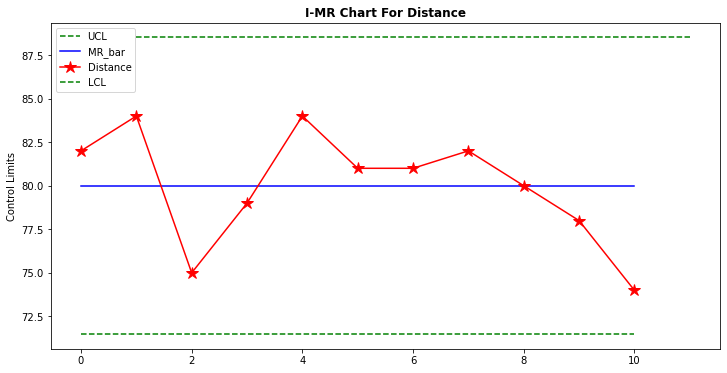

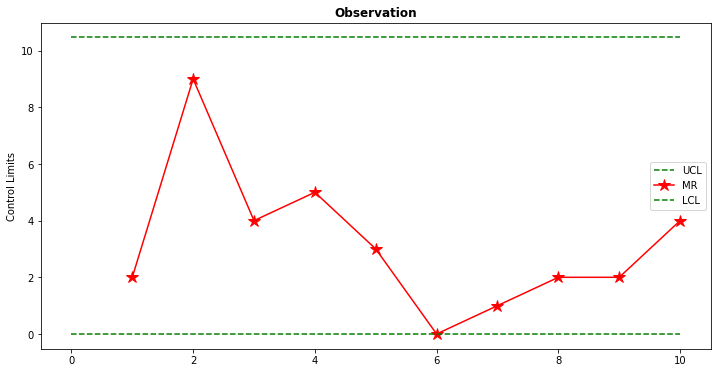

In [5]:
mi_Chart(df,2)

# 2.X_bar & R_Chart

In [6]:
df=pd.DataFrame({
           'Sample':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
            '1':[44,50,32,52,16,36,21,29,26,24,18,24,19,8,24,56,32,8,51,30],
            '2':[26,48,28,55,16,36,22,21,46,22,24,20,21,11,18,52,22,12,54,28],
            '3':[24,51,26,56,21,35,18,23,44,22,24,26,27,12,27,56,18,11,52,35],
            '4':[34,43,22,44,26,31,21,22,14,44,49,23,28,12,24,50,25,17,49,22]
    
             })

df[['1','2','3','4']]=df[['1','2','3','4']].astype(float)
df

,Sample,1,2,3,4
0,1,44.0,26.0,24.0,34.0
1,2,50.0,48.0,51.0,43.0
2,3,32.0,28.0,26.0,22.0
3,4,52.0,55.0,56.0,44.0
4,5,16.0,16.0,21.0,26.0
5,6,36.0,36.0,35.0,31.0
6,7,21.0,22.0,18.0,21.0
7,8,29.0,21.0,23.0,22.0
8,9,26.0,46.0,44.0,14.0
9,10,24.0,22.0,22.0,44.0


A1: 0.73
D3: 0
D4: 2.28
X_bar: 29.875
UCL_X: 38.5255
LCL_X: 21.2245
R_bar: 11.85
UCL_R: 27.017999999999997
LCL_R: 0.0
    Sample     1     2     3     4  sample_x_bar  sample_range    UCL_X  \
0        1  44.0  26.0  24.0  34.0         32.00          20.0  38.5255   
1        2  50.0  48.0  51.0  43.0         48.00           8.0  38.5255   
2        3  32.0  28.0  26.0  22.0         27.00          10.0  38.5255   
3        4  52.0  55.0  56.0  44.0         51.75          12.0  38.5255   
4        5  16.0  16.0  21.0  26.0         19.75          10.0  38.5255   
5        6  36.0  36.0  35.0  31.0         34.50           5.0  38.5255   
6        7  21.0  22.0  18.0  21.0         20.50           4.0  38.5255   
7        8  29.0  21.0  23.0  22.0         23.75           8.0  38.5255   
8        9  26.0  46.0  44.0  14.0         32.50          32.0  38.5255   
9       10  24.0  22.0  22.0  44.0         28.00          22.0  38.5255   
10      11  18.0  24.0  24.0  49.0         28.75         

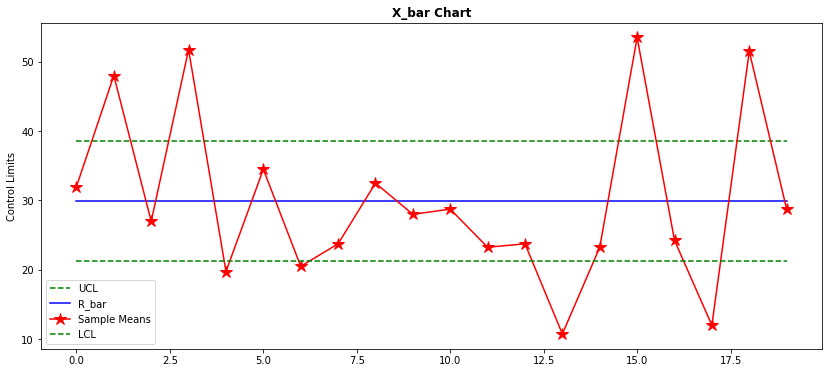

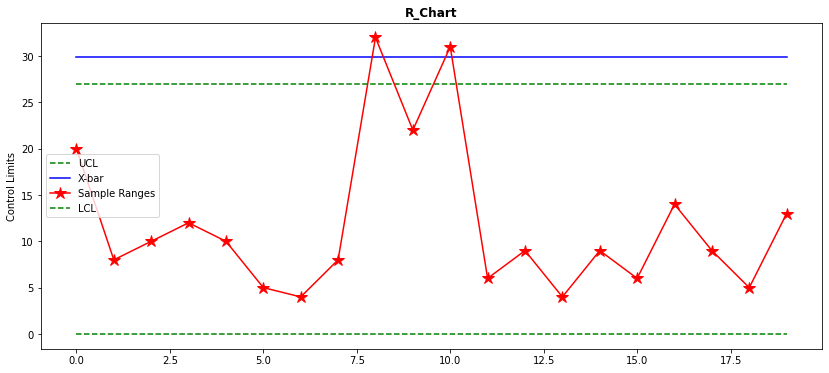

In [7]:
def x_barrange_chart(df):
        A1 =0.73
        D4 =2.28
        D3 = 0
        
        sample_x_bar=df.iloc[:,1:].mean(axis=1)
        df['sample_x_bar']= sample_x_bar
        sample_range = (df.iloc[:,1:].max(axis=1))-(df.iloc[:,1:].min(axis=1))
        df['sample_range']=sample_range
        x_bar =  df['sample_x_bar'].mean()
        x_bars = np.repeat( x_bar  ,len(df))
        r_bar =  df['sample_range'].mean()
        r_bars = np.repeat(r_bar,len(df))
                #X_bar Chart
        ucl_X = x_bar + A1 * r_bar
        ucl_Xs = np.repeat(ucl_X,len(df))
        lcl_X = x_bar - A1 * r_bar
        lcl_Xs = np.repeat(lcl_X ,len(df))
                #Range Chart
        UCL_R = D4 * r_bar
        ucl_r = np.repeat(UCL_R,len(df))
        LCL_R = D3 * r_bar
        lcl_r = np.repeat( LCL_R,len(df))
        
        print('A1:',A1)
        print('D3:',D3)
        print('D4:',D4)
        
        print('X_bar:',x_bar)
        
        print('UCL_X:',ucl_X)
        print('LCL_X:',lcl_X)
        df['UCL_X'] = ucl_X
        df['LCL_X'] = lcl_X
        
        print('R_bar:',r_bar) 
        print('UCL_R:',UCL_R)
        print('LCL_R:',LCL_R)
        df['UCL_R'] = UCL_R
        df['LCL_R'] = UCL_R
        
        
        plt.figure(figsize=(14,6))
        plt.title('X_bar',fontweight='bold')
        plt.plot(ucl_Xs ,color='green',ls='--',label='UCL')
        plt.plot(x_bars ,color='blue',label='R_bar')
        plt.plot(df['sample_x_bar'],color='red',label='Sample Means',marker='*',markersize=12)
        plt.plot(lcl_Xs,color='green',ls='--',label='LCL')
        plt.legend(loc='best')
        plt.title('X_bar Chart',fontweight='bold')
        plt.xlabel='Month'
        plt.ylabel('Control Limits')
        
        
         
        plt.figure(figsize=(14,6))
        plt.plot( ucl_r  ,color='green',ls='--',label='UCL')
        plt.plot(x_bars ,color='blue',label='X-bar')
        plt.plot(df['sample_range'],color='red',label='Sample Ranges',marker='*',markersize=12)
        plt.plot(lcl_r,color='green',ls='--',label='LCL')
        plt.legend(loc='best')
        plt.title('R_Chart',fontweight='bold')
        plt.xlabel='Month'
        plt.ylabel('Control Limits')
        print(df)
        print('\n------------------------Control X_Bar Chart Validation--------------------------------------------------')
        i = 0
        control = True
        for index,i in df.iterrows():
            if i['sample_x_bar'] > (i['UCL_X']) or i['sample_x_bar'] < (i['LCL_X']):
                print('Group',i['Sample'],'is Out of Control Limit')
        control = False
        i += 1
        if control == True:
            print('All points within control limits in X-bar Chart.')
            
        print('\n------------------------Control R_Bar Chart Validation--------------------------------------------------')
        i = 0
        control = True
        for index,i in df.iterrows():
            if i['sample_range'] > (i['UCL_R']) or i['sample_range'] < (i['LCL_R']):
                print('Group',i['Sample'],'is Out of Control Limit')
        control = False
        i += 1
        if control == True:
            print('All points within control limits in R-bar Chart.')
            
x_barrange_chart(df)

# 3.X_bar S Chart

In [8]:
df=pd.DataFrame({
           'Sample':[1,2,3,4,5,6,7,8,9,10,11,12],
            '1':[65,54,66,37,67,36,10,36,36,38,55,22],
            '2':[63,55,14,54,10,36,12,36,46,46,12,22],
            '3':[55,55,54,36,12,37,12,35,35,36,67,33],
            '4':[54,54,34,35,65,37,14,24,36,34,55,12]
    
             })

df[['1','2','3','4']]=df[['1','2','3','4']].astype(float)
df

,Sample,1,2,3,4
0,1,65.0,63.0,55.0,54.0
1,2,54.0,55.0,55.0,54.0
2,3,66.0,14.0,54.0,34.0
3,4,37.0,54.0,36.0,35.0
4,5,67.0,10.0,12.0,65.0
5,6,36.0,36.0,37.0,37.0
6,7,10.0,12.0,12.0,14.0
7,8,36.0,36.0,35.0,24.0
8,9,36.0,46.0,35.0,36.0
9,10,38.0,46.0,36.0,34.0


Samples Mean: 38.520833333333336
Sample Std: 10.089317730316173
X_bar Upper Class Limit: 54.946242598288066
X_bar Lower Class Limit: 22.095424068378605
S_bar Upper Class Limit: 22.86239397689645
S_bar Lower Class Limit: 0.0
    Sample     1     2     3     4  sampleAverage  SampleStd        UCL  \
0        1  65.0  63.0  55.0  54.0          59.25   5.560276  54.946243   
1        2  54.0  55.0  55.0  54.0          54.50   0.577350  54.946243   
2        3  66.0  14.0  54.0  34.0          42.00  22.861904  54.946243   
3        4  37.0  54.0  36.0  35.0          40.50   9.036961  54.946243   
4        5  67.0  10.0  12.0  65.0          38.50  31.775252  54.946243   
5        6  36.0  36.0  37.0  37.0          36.50   0.577350  54.946243   
6        7  10.0  12.0  12.0  14.0          12.00   1.632993  54.946243   
7        8  36.0  36.0  35.0  24.0          32.75   5.852350  54.946243   
8        9  36.0  46.0  35.0  36.0          38.25   5.188127  54.946243   
9       10  38.0  46.0  36

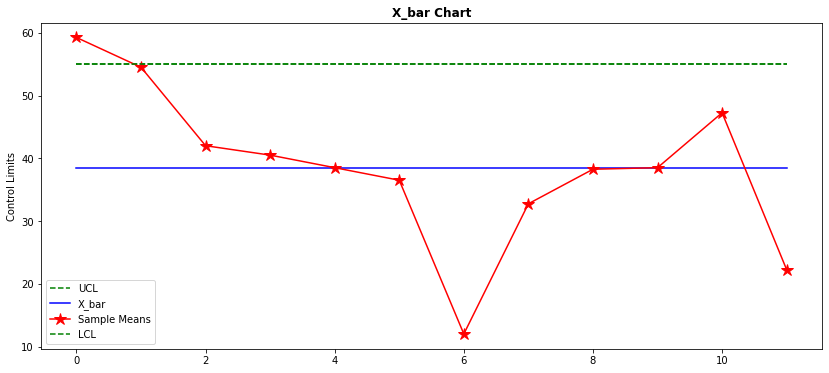

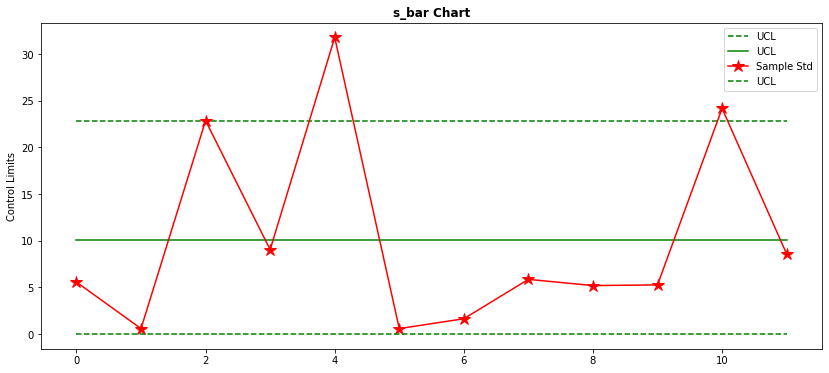

In [9]:
def x_bar_s_chart(df):
    A3 = 1.628
    D4 = 2.266
    D3 = 0
    
    sampleAverage=df.iloc[:,1:].mean(axis=1)
    SampleStd = df.iloc[:,1:].std(axis=1)
    df['sampleAverage'] = sampleAverage
    df['SampleStd'] = SampleStd
    
    x_bar =  df['sampleAverage'].mean()
    x_bars =  np.repeat( x_bar,len(df))

    
    s_bar =  df['SampleStd'].mean()
    s_bars =  np.repeat(s_bar,len(df))

    UCL = x_bar + A3 * s_bar 
    uclxs = np.repeat(UCL,len(df))
    
    LCL = x_bar - A3 * s_bar
    lclxs = np.repeat(UCL,len(df))
    
    UCL_s = D4 * s_bar 
    ucls = np.repeat(UCL_s,len(df))
    
    LCL_s = D3 * s_bar 
    lcls = np.repeat(LCL_s,len(df))
    
    print('Samples Mean:',x_bar)
    print('Sample Std:',s_bar)
    print('X_bar Upper Class Limit:', UCL)
    print('X_bar Lower Class Limit:',LCL)
    df['UCL'] = UCL
    df['LCL'] = LCL
    
    print('S_bar Upper Class Limit:',UCL_s)
    print('S_bar Lower Class Limit:',LCL_s)
    df['UCL_st'] =UCL_s
    df['LCL_st'] =LCL_s
      
    plt.figure(figsize=(14,6))
    plt.title('X_bar',fontweight='bold')
    plt.plot(uclxs,color='green',ls='--',label='UCL')
    plt.plot(x_bars ,color='blue',label='X_bar')
    plt.plot(df['sampleAverage'],color='red',label='Sample Means',marker='*',markersize=12)
    plt.plot(lclxs,color='green',ls='--',label='LCL')
    plt.legend(loc='best')
    plt.title('X_bar Chart',fontweight='bold')
    plt.xlabel='Month'
    plt.ylabel('Control Limits')
    
    plt.figure(figsize=(14,6))
    plt.title('s_bar_X_Chart',fontweight='bold')
    plt.plot( ucls,color='green',ls='--',label='UCL')
    plt.plot(s_bars ,color='green',label='UCL')
    plt.plot(df['SampleStd'],color='red',label='Sample Std',marker='*',markersize=12)
    plt.plot( lcls,color='green',ls='--',label='UCL')
    plt.legend(loc='best')
    plt.title('s_bar Chart',fontweight='bold')
    plt.xlabel='Month'
    plt.ylabel('Control Limits')
      
    print(df)
    print('\n------------------------Control Bar Chart Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['sampleAverage'] > (i['UCL']) or i['sampleAverage'] < (i['LCL']):
            print('Sample', i['Sample'], 'out of X-bar defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits in X-bar Chart.')
        
        
    print('\n------------------------R_Chart Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['SampleStd'] > (i['UCL_st']) or i['SampleStd'] < (i['LCL_st']):
            print('Sample', i['Sample'], 'out of X-bar defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits in R-bar Chart.')
               
x_bar_s_chart(df)

# 4.U-Chart Variable Size n

In [10]:
df=pd.DataFrame({
          'Lot':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'Sample':[100,120,150,80,130,125,140,90,100,110,115,120,90,85,100,120,115,120,120,110],
          'Number_Defects':[52,48,46,25,39,39,54,70,41,43,47,52,44,47,50,40,47,46,44,50],
            
             })

df

,Lot,Sample,Number_Defects
0,1,100,52
1,2,120,48
2,3,150,46
3,4,80,25
4,5,130,39
5,6,125,39
6,7,140,54
7,8,90,70
8,9,100,41
9,10,110,43


0.4125
K groups: 20
Total Defects: 924
Total Samples: 2240
    Lot  Sample  Number_Defects   u=(c/n)   u_bar   UCL   LCL
0     1     100              52  0.520000  0.4125  0.61  0.22
1     2     120              48  0.400000  0.4125  0.59  0.24
2     3     150              46  0.306667  0.4125  0.57  0.26
3     4      80              25  0.312500  0.4125  0.63  0.20
4     5     130              39  0.300000  0.4125  0.58  0.24
5     6     125              39  0.312000  0.4125  0.58  0.24
6     7     140              54  0.385714  0.4125  0.58  0.25
7     8      90              70  0.777778  0.4125  0.62  0.21
8     9     100              41  0.410000  0.4125  0.61  0.22
9    10     110              43  0.390909  0.4125  0.60  0.23
10   11     115              47  0.408696  0.4125  0.59  0.23
11   12     120              52  0.433333  0.4125  0.59  0.24
12   13      90              44  0.488889  0.4125  0.62  0.21
13   14      85              47  0.552941  0.4125  0.62  0.20
14   15    

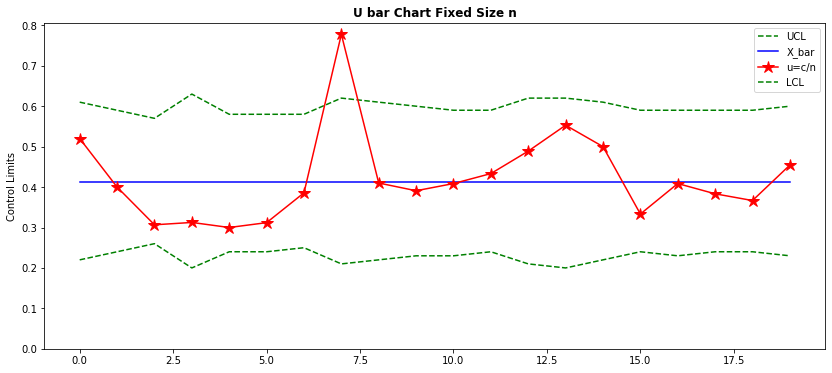

In [11]:
import math
def U_Chart(df):
    c= df['Number_Defects']
    n= df['Sample']
    u= df['Number_Defects']/df['Sample']
    df['u=(c/n)']=u
    sum_c=df['Number_Defects'].sum()
    sample_size = df['Sample'].sum()
   
    
    k=len(df['Sample'])
    u_bar =  sum_c/sample_size
    print(u_bar)
    u_bars = np.repeat(u_bar,len(df))
    df['u_bar'] = u_bars
    
    uc=[]
    lc=[]
    for index,i in df.iterrows():
        ucl= round(u_bar + 3 * (math.sqrt(i['u_bar'])/math.sqrt(i['Sample'])),2)
        lcl= round(u_bar - 3 * (math.sqrt(i['u_bar'])/math.sqrt(i['Sample'])),2)
        uc.append(ucl)
        lc.append(lcl)
    df['UCL']= uc
    df['LCL'] = lc
    print('K groups:',k)
    print('Total Defects:',sum_c)
    print('Total Samples:', sample_size)
    print(df)

    plt.figure(figsize=(14,6))
    plt.title('U Chart',fontweight='bold')
    plt.plot(uc,color='green',ls='--',label='UCL')
    plt.plot(df['u_bar']  ,color='blue',label='X_bar')
    plt.plot(df['u=(c/n)'],color='red',label='u=c/n',marker='*',markersize=12)
    plt.plot(lc,color='green',ls='--',label='LCL')
    plt.legend(loc='best')
    plt.title('U bar Chart Fixed Size n',fontweight='bold')
  
    plt.ylabel('Control Limits')
    plt.ylim(bottom=0)
    
    print('\n------------------------Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['u=(c/n)'] > (i['UCL']) or i['u=(c/n)'] < (i['LCL']):
            print('Group', i['Lot'], 'out of U-Control Chart defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits.')
    

U_Chart(df)

# 5.U-Chart fixed

In [12]:
df=pd.DataFrame({
          'Lot':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'Sample':[100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
          'Number_Defects':[52,48,46,25,39,39,54,70,41,43,47,52,44,47,50,40,47,46,44,50],
            
             })

df

,Lot,Sample,Number_Defects
0,1,100,52
1,2,100,48
2,3,100,46
3,4,100,25
4,5,100,39
5,6,100,39
6,7,100,54
7,8,100,70
8,9,100,41
9,10,100,43


U_bar: 0.462
K groups: 20
Total Defects: 924
Total Samples: 2000
    Lot  Sample  Number_Defects  u=(c/n)  u_bar   ucl   lcl
0     1     100              52     0.52  0.462  0.67  0.26
1     2     100              48     0.48  0.462  0.67  0.26
2     3     100              46     0.46  0.462  0.67  0.26
3     4     100              25     0.25  0.462  0.67  0.26
4     5     100              39     0.39  0.462  0.67  0.26
5     6     100              39     0.39  0.462  0.67  0.26
6     7     100              54     0.54  0.462  0.67  0.26
7     8     100              70     0.70  0.462  0.67  0.26
8     9     100              41     0.41  0.462  0.67  0.26
9    10     100              43     0.43  0.462  0.67  0.26
10   11     100              47     0.47  0.462  0.67  0.26
11   12     100              52     0.52  0.462  0.67  0.26
12   13     100              44     0.44  0.462  0.67  0.26
13   14     100              47     0.47  0.462  0.67  0.26
14   15     100              50    

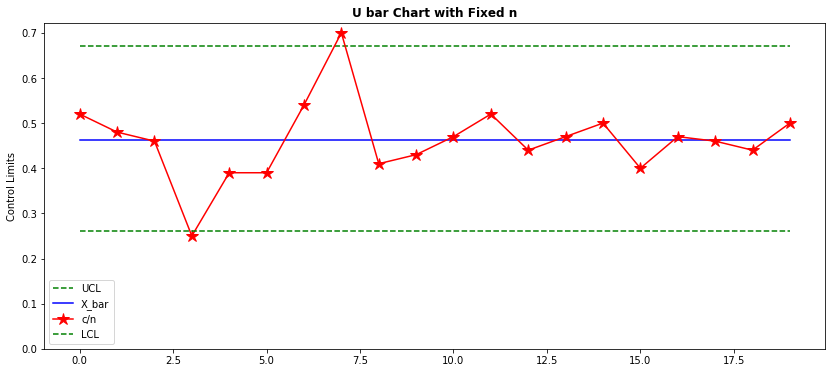

In [13]:
import math
def U_Chart_fix(df):
    c= df['Number_Defects']
    n= df['Sample']
    u= df['Number_Defects']/df['Sample']
    df['u=(c/n)']=u
    sum_c=df['Number_Defects'].sum()
    sample_size = df['Sample'].sum()
   
    
    k=len(df['Sample'])
    u_bar =  sum_c/sample_size
    print('U_bar:',u_bar)
    u_bars = np.repeat(u_bar,len(df))
    
    df['u_bar'] = u_bars
    
    ucl = []
    lcl = []
    for index,i in df.iterrows():
        uc = round(u_bar + 3 * (math.sqrt(u_bar)/math.sqrt(i['Sample'])),2)
        lc = round(u_bar - 3 * (math.sqrt(u_bar)/math.sqrt(i['Sample'])),2)
        ucl.append(ucl)
        lcl.append(lcl)
    df['ucl']=uc
    df['lcl']=lc
    
    print('K groups:',k)
    print('Total Defects:',sum_c)
    print('Total Samples:', sample_size)
    print(df)

    plt.figure(figsize=(14,6))
    plt.title('C Chart with Fixed n',fontweight='bold')
    plt.plot(df['ucl'],color='green',ls='--',label='UCL')
    plt.plot(df['u_bar'],color='blue',label='X_bar')
    plt.plot(df['u=(c/n)'],color='red',label='c/n',marker='*',markersize=12)
    plt.plot(df['lcl'],color='green',ls='--',label='LCL')
    plt.legend(loc='best')
    plt.title('U bar Chart with Fixed n',fontweight='bold')
  
    plt.ylabel('Control Limits')
    plt.ylim(bottom=0)
    
    
    print('\n------------------------Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['u=(c/n)'] > (i['ucl']) or i['u=(c/n)'] < (i['lcl']):
            print('Group', i['Lot'], 'out of u-bar defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits.')
        
    
U_Chart_fix(df)    

# 6.P-Chart

In [14]:
df=pd.DataFrame({
          'Lot':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'Sample':[1250,1300,1350,1200,1050,1050,1200,1100,1000,600,1350,1250,1200,1100,1050,950,1560,1150,1230,1100],
          'Number_Defects':[18,15,13,16,8,6,18,14,22,12,13,19,33,20,20,20,22,17,19,21],
            
             })

df

,Lot,Sample,Number_Defects
0,1,1250,18
1,2,1300,15
2,3,1350,13
3,4,1200,16
4,5,1050,8
5,6,1050,6
6,7,1200,18
7,8,1100,14
8,9,1000,22
9,10,600,12


Groups: 20
Total No. of Defectives: 23040
Average No. of Defectives: 1152.0
P_bar: 0.015017361111111112
q_bar: 0.9849826388888889

UCL: 0.026018458568238097
UCL: 0.004016263653984126
    Lot  Sample  Number_Defects  Defective_Rate    p_bars       UCL       LCL
0     1    1250              18        0.014400  0.015017  0.025337  0.004697
1     2    1300              15        0.011538  0.015017  0.025137  0.004898
2     3    1350              13        0.009630  0.015017  0.024948  0.005087
3     4    1200              16        0.013333  0.015017  0.025550  0.004485
4     5    1050               8        0.007619  0.015017  0.026277  0.003757
5     6    1050               6        0.005714  0.015017  0.026277  0.003757
6     7    1200              18        0.015000  0.015017  0.025550  0.004485
7     8    1100              14        0.012727  0.015017  0.026018  0.004016
8     9    1000              22        0.022000  0.015017  0.026555  0.003479
9    10     600              12      

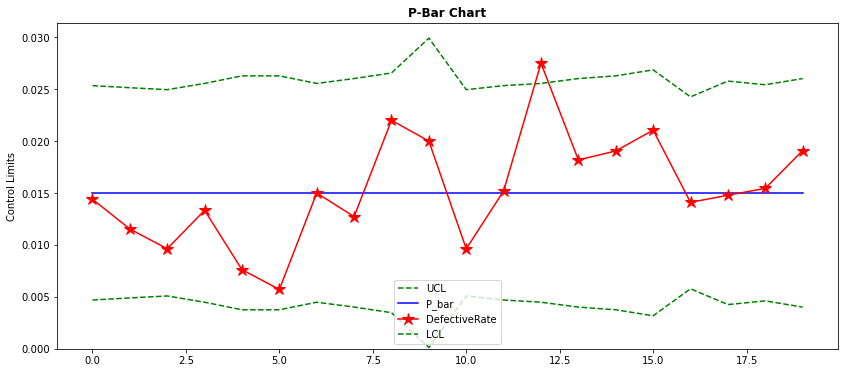

In [15]:
def p_chart(df):
    k=len(df['Lot'])
    n= df['Sample'].sum()
    p_bar =  df['Number_Defects'].sum()/df['Sample'].sum()
    p_bars = np.repeat(p_bar,len(df['Sample']))
    
    p_bars = []
    for index,i in df.iterrows():
         p_bars.append(i['Number_Defects']/i['Sample'])
    df['Defective_Rate'] = p_bars
    n_bar = df['Sample'].sum()/len(df['Sample'])
    q_bar = 1-p_bar
    q_bars = np.repeat(q_bar,len(df['Sample']))
    p_bars= df['Number_Defects'].sum()/df['Sample'].sum()
    df['p_bars'] =   p_bars
    UCL = []
    LCL = []
    for index,i in df.iterrows():
        uc = p_bar + 3 * (math.sqrt((p_bar*(q_bar))/i['Sample']))
        lc = p_bar - 3 * (math.sqrt((p_bar*(q_bar))/i['Sample']))
        UCL.append(uc)
        LCL.append(lc)
    df['UCL'] = UCL
    df['LCL'] = LCL
    print('Groups:',k)
    print('Total No. of Defectives:',n)
    print('Average No. of Defectives:',n_bar)
    print('P_bar:',p_bar)
    print('q_bar:',q_bar)
    print('\nUCL:',uc)
    print('UCL:',lc)
    
    plt.figure(figsize=(14,6))
    plt.title('P Chart',fontweight='bold')
    plt.plot(df['UCL'],color='green',ls='--',label='UCL')
    plt.plot(df['p_bars'],color='blue',label='P_bar')
    plt.plot(df['Defective_Rate'],color='red',label='DefectiveRate',marker='*',markersize=12)
    plt.plot(df['LCL'],color='green',ls='--',label='LCL')
    plt.legend(loc='best')
    plt.title('P-Bar Chart',fontweight='bold')
    plt.ylabel('Control Limits')
    plt.ylim(bottom=0)
    
    print(df)
    print('\n------------------------Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['Defective_Rate'] > (i['UCL']) or i['Defective_Rate'] < (i['LCL']):
            print('Group', i['Lot'], 'out of P Control Chart defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits.')
        
p_chart(df)

# 7.np_bar chart

In [16]:
df=pd.DataFrame({
          'Lot':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'Sample':[200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200],
          'Number_Defects':[4,8,6,6,4,8,2,1,9,6,8,1,2,9,4,3,9,6,2,7],
            
             })

df

,Lot,Sample,Number_Defects
0,1,200,4
1,2,200,8
2,3,200,6
3,4,200,6
4,5,200,4
5,6,200,8
6,7,200,2
7,8,200,1
8,9,200,9
9,10,200,6


Groups: 20
Total Number of Defects: 105
Total no. of np: 4000
P_bar: 0.02625
q_bar: 0.97375
np_bar: 5.25
    Lot  Sample  Number_Defects  np_bar     UCL    LCL
0     1     200               4    5.25  12.033 -1.533
1     2     200               8    5.25  12.033 -1.533
2     3     200               6    5.25  12.033 -1.533
3     4     200               6    5.25  12.033 -1.533
4     5     200               4    5.25  12.033 -1.533
5     6     200               8    5.25  12.033 -1.533
6     7     200               2    5.25  12.033 -1.533
7     8     200               1    5.25  12.033 -1.533
8     9     200               9    5.25  12.033 -1.533
9    10     200               6    5.25  12.033 -1.533
10   11     200               8    5.25  12.033 -1.533
11   12     200               1    5.25  12.033 -1.533
12   13     200               2    5.25  12.033 -1.533
13   14     200               9    5.25  12.033 -1.533
14   15     200               4    5.25  12.033 -1.533
15   16     200

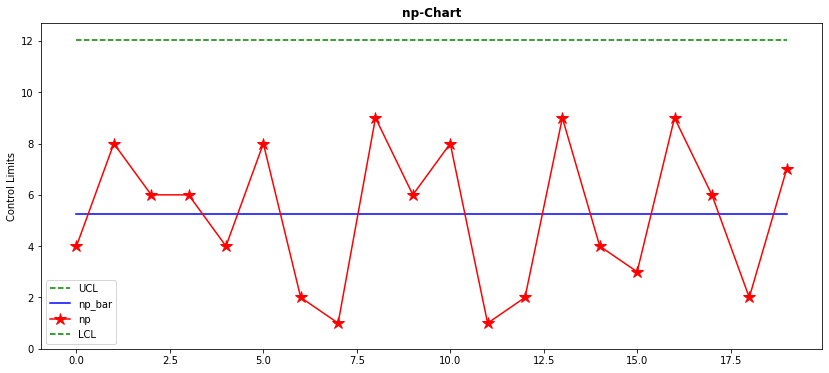

In [17]:
def np_chart(df):
    k= len(df['Lot'])
    np_count = df['Number_Defects'].sum()
    np_sum = df['Sample'].sum()
    p_bar = np_count/ np_sum
    q_bar = 1-p_bar
    np_bar = np_count / k
    np_bars = np.repeat(np_bar,len(df['Sample']))
    df['np_bar'] = np_bars
   
    
    print('Groups:',k)
    print('Total Number of Defects:',np_count)
    print('Total no. of np:',np_sum)
    print('P_bar:',p_bar)
    print('q_bar:',q_bar)
    print('np_bar:',np_bar)
    
    ucl = round(np_bar + 3 * (math.sqrt(np_bar * (q_bar))),3)
    lcl = round(np_bar - 3 * (math.sqrt(np_bar * (q_bar))),3)
    df['UCL'] = ucl
    df['LCL'] = lcl
    
    plt.figure(figsize=(14,6))
    plt.title('P Chart',fontweight='bold')
    plt.plot(df['UCL'],color='green',ls='--',label='UCL')
    plt.plot(df['np_bar'],color='blue',label='np_bar')
    plt.plot(df['Number_Defects'],color='red',label='np',marker='*',markersize=12)
    plt.plot(df['LCL'],color='green',ls='--',label='LCL')
    plt.legend(loc='best')
    plt.title('np-Chart',fontweight='bold')
    plt.ylabel('Control Limits')
    plt.ylim(bottom=0)
    
    print(df)
    print('\n------------------------Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['Number_Defects'] > (i['UCL']) or i['Number_Defects'] < (i['LCL']):
            print('Group', i['Lot'], 'out of fraction defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits.')
        
np_chart(df)

# 8.c-chart

In [18]:
df=pd.DataFrame({
          'Lot':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
          'Sample':[500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500],
          'Number_Defects':[12,14,16,18,16,14,12,12,32,16, 18, 16,14,12,16, 18, 12,19,18,21]            
             })
df

,Lot,Sample,Number_Defects
0,1,500,12
1,2,500,14
2,3,500,16
3,4,500,18
4,5,500,16
5,6,500,14
6,7,500,12
7,8,500,12
8,9,500,32
9,10,500,16


No. of lots: 20
Total Defectives: 326
Total Defectives: 16.3
    Lot  Sample  Number_Defects  c_bar        UCL       LCL
0     1     500              12   16.3  28.411978  4.188022
1     2     500              14   16.3  28.411978  4.188022
2     3     500              16   16.3  28.411978  4.188022
3     4     500              18   16.3  28.411978  4.188022
4     5     500              16   16.3  28.411978  4.188022
5     6     500              14   16.3  28.411978  4.188022
6     7     500              12   16.3  28.411978  4.188022
7     8     500              12   16.3  28.411978  4.188022
8     9     500              32   16.3  28.411978  4.188022
9    10     500              16   16.3  28.411978  4.188022
10   11     500              18   16.3  28.411978  4.188022
11   12     500              16   16.3  28.411978  4.188022
12   13     500              14   16.3  28.411978  4.188022
13   14     500              12   16.3  28.411978  4.188022
14   15     500              16   16.3 

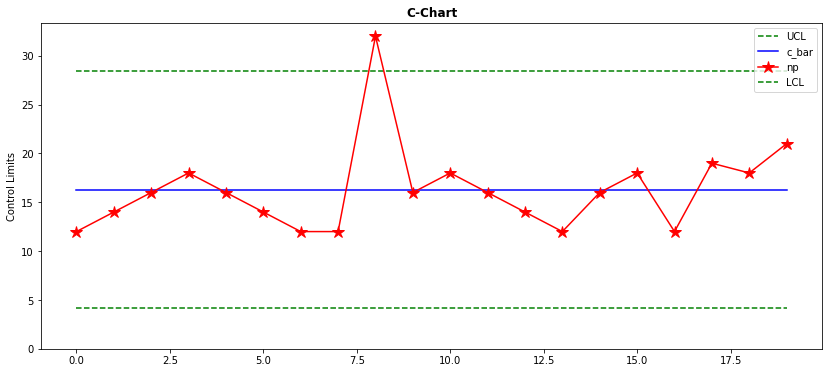

In [19]:
def c_chart(df):
    k=len(df['Lot'])
    c_sum = df['Number_Defects'].sum()
    c_bar = c_sum /k
    c_bars = np.repeat( c_bar,len(df['Number_Defects']))
    df['c_bar']=c_bars
    
    ucl = c_bar + 3 * math.sqrt(c_bar)
    lcl = c_bar - 3 * math.sqrt(c_bar)
    df['UCL'] = ucl
    df['LCL'] = lcl
    
    print('No. of lots:',k)
    print('Total Defectives:',c_sum)
    print('Total Defectives:',c_bar)
    
    plt.figure(figsize=(14,6))
    plt.title('P Chart',fontweight='bold')
    plt.plot(df['UCL'],color='green',ls='--',label='UCL')
    plt.plot(df['c_bar'],color='blue',label='c_bar')
    plt.plot(df['Number_Defects'],color='red',label='np',marker='*',markersize=12)
    plt.plot(df['LCL'],color='green',ls='--',label='LCL')
    plt.legend(loc='best')
    plt.title('C-Chart',fontweight='bold')
    plt.ylabel('Control Limits')
    plt.ylim(bottom=0)
    print(df)
    
    print('\n------------------------Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['Number_Defects'] > (i['UCL']) or i['Number_Defects'] < (i['LCL']):
            print('Group', i['Lot'], 'out of fraction defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits.')
c_chart(df)

No. of lots: 20
Total Defectives: 326
Total Defectives: 16.3
    Lot  Sample  Number_Defects  c_bar        UCL       LCL
0     1     500              12   16.3  28.411978  4.188022
1     2     500              14   16.3  28.411978  4.188022
2     3     500              16   16.3  28.411978  4.188022
3     4     500              18   16.3  28.411978  4.188022
4     5     500              16   16.3  28.411978  4.188022
5     6     500              14   16.3  28.411978  4.188022
6     7     500              12   16.3  28.411978  4.188022
7     8     500              12   16.3  28.411978  4.188022
8     9     500              32   16.3  28.411978  4.188022
9    10     500              16   16.3  28.411978  4.188022
10   11     500              18   16.3  28.411978  4.188022
11   12     500              16   16.3  28.411978  4.188022
12   13     500              14   16.3  28.411978  4.188022
13   14     500              12   16.3  28.411978  4.188022
14   15     500              16   16.3 

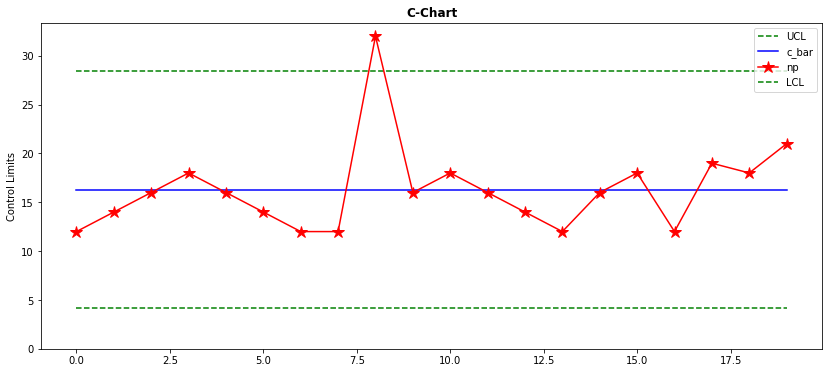

In [20]:
def c_chart(df):
    k=len(df['Lot'])
    c_sum = df['Number_Defects'].sum()
    c_bar = c_sum /k
    c_bars = np.repeat( c_bar,len(df['Number_Defects']))
    df['c_bar']=c_bars
    
    ucl = c_bar + 3 * math.sqrt(c_bar)
    lcl = c_bar - 3 * math.sqrt(c_bar)
    df['UCL'] = ucl
    df['LCL'] = lcl
    
    print('No. of lots:',k)
    print('Total Defectives:',c_sum)
    print('Total Defectives:',c_bar)
    
    plt.figure(figsize=(14,6))
    plt.title('P Chart',fontweight='bold')
    plt.plot(df['UCL'],color='green',ls='--',label='UCL')
    plt.plot(df['c_bar'],color='blue',label='c_bar')
    plt.plot(df['Number_Defects'],color='red',label='np',marker='*',markersize=12)
    plt.plot(df['LCL'],color='green',ls='--',label='LCL')
    plt.legend(loc='best')
    plt.title('C-Chart',fontweight='bold')
    plt.ylabel('Control Limits')
    plt.ylim(bottom=0)
    
    print(df)
    print('\n------------------------Validation--------------------------------------------------')
    i = 0
    control = True
    for index,i in df.iterrows():
        if i['Number_Defects'] > (i['UCL']) or i['Number_Defects'] < (i['LCL']):
            print('Group', i['Lot'], 'out of C-defective cotrol limits!')
            control = False
    i += 1
    if control == True:
        print('All points within control limits.')
        
c_chart(df)